In [0]:
library(ggplot2)
library(dplyr)
library(reshape2)

NameError: ignored

# Access the data from IBM Cloud Object Storage

In [0]:
# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
library("aws.s3")
obj <- get_object(
    object = "joshua_tree_tweets.csv",
    bucket = "joshuatreenationalparkproject-donotdelete-pr-ojizwoldukkduh",
    key = "e686df0309454638aa2f5ab9208fb3e5",
    secret = "9d518a941eebece649831a9a1073f02971d78df8ba7accc3",
    check_region = FALSE,
    base_url = "s3-api.us-geo.objectstorage.service.networklayer.com")

df <- read.csv(text = rawToChar(obj))
head(df)

X,CONTENT,ID,timestamp,tweet_url,username,links,nlu_status,language,n_char,sentiment_label,sentiment_score,emotion_anger,emotion_disgust,emotion_fear,emotion_joy,emotion_sadness
0,"#joshuatree @ Joshua Tree, California",1.06e+18,10/27/2018 23:59,/flipcars4profit/status/1056334566879825920,Auto Dealers Mastermind,[],pass,en,37,neutral,0.000000,0.034928,0.043402,0.109538,0.479826,0.071560
1,On this cold rainy Saturday thinking back to Last weekend and the sunny high desert. @ Joshua Tree National Park https://www.instagram.com/p/BpdKtNagxxI/?utm_source=ig_twitter_share&igshid=1ibp1rq3q2cty ...,1.06e+18,10/27/2018 23:55,/BrentWalls39/status/1056333484011282432,Brent Walls,['https://www.instagram.com/p/BpdKtNagxxI/?utm_source=ig_twitter_share&igshid=1ibp1rq3q2cty'],pass,en,206,negative,-0.906150,0.031185,0.025990,0.132300,0.680365,0.142227
2,"TONIGHT! The debut of new @JailWeddings female-led alter-ego SIRENS IN THE NIGHT will be the musical guests after this Halloween play, also starring yours truly. Tonight in Joshua Tree at 8 sharp!!! FREE https://twitter.com/space_books/status/1054042963280519168 ...",1.06e+18,10/27/2018 23:53,/bohemophiliac/status/1056333174748266496,Gabriel Hart,['https://twitter.com/space_books/status/1054042963280519168'],pass,en,266,positive,0.561995,0.031708,0.029661,0.058873,0.857053,0.042300
3,"Well, you never know. There were all manner of dubious master & mixdown formats during that time. Lotsa records were only mixed to DAT ...in some cases only CD masters survive I bought a Joshua Tree reissue I'm CERTAIN was cut from a CD *barfs king kong*",1.06e+18,10/27/2018 23:41,/wheatus/status/1056330018840866822,wheatus,[],pass,en,254,negative,-0.564781,0.106103,0.059054,0.029913,0.495787,0.012700
4,"I'm at Joshua Tree Saloon in Twentynine Palms, CA https://www.swarmapp.com/c/jQG0xbViC1S",1.06e+18,10/27/2018 23:36,/sheckie420/status/1056328908893810688,John Sheckells,['https://www.swarmapp.com/c/jQG0xbViC1S'],pass,en,88,neutral,0.000000,0.019354,0.039272,0.131023,0.727467,0.048922
5,"Praying for our brothers and sisters at the Tree of Life Synagogue in Pittsburgh. ""Have I not commanded you? Be strong and courageous. Do not be frightened, and do not be dismayed, for the LORD your God is with you wherever you go."" Joshua 1:9",1.06e+18,10/27/2018 23:29,/UCofAssonet/status/1056327144824098819,UCC Assonet,[],pass,en,243,positive,0.727971,0.062389,0.061172,0.107332,0.662162,0.145874


In [0]:
# convert timestamp column to datetime format
df$timestamp = lubridate::mdy_hm(df$timestamp)

# Plotting

### Distribution of sentiments

Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 63 rows containing missing values (geom_bar).”

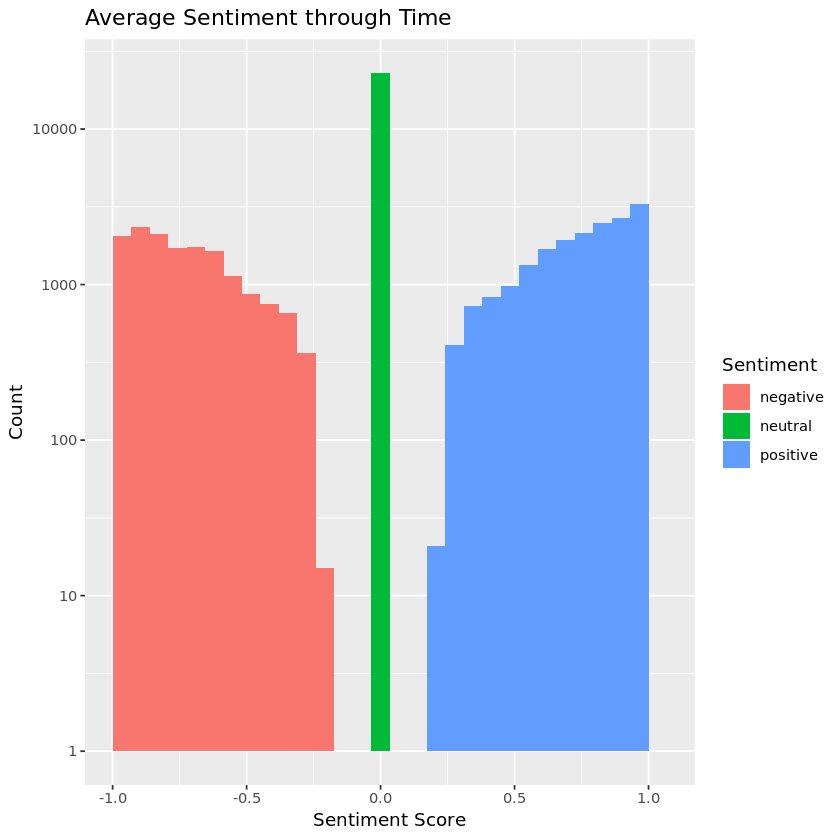

In [0]:
# logscale version
df %>% 
    # remove missing NLU sentiments
    filter(!is.na(sentiment_score)) %>%
    # plot
    ggplot(aes(sentiment_score, fill=sentiment_label)) +
    geom_histogram(bins=30) + 
    labs(title='Average Sentiment through Time',
        y = 'Count',
        x = 'Sentiment Score',
        fill = 'Sentiment') +
    scale_y_log10()

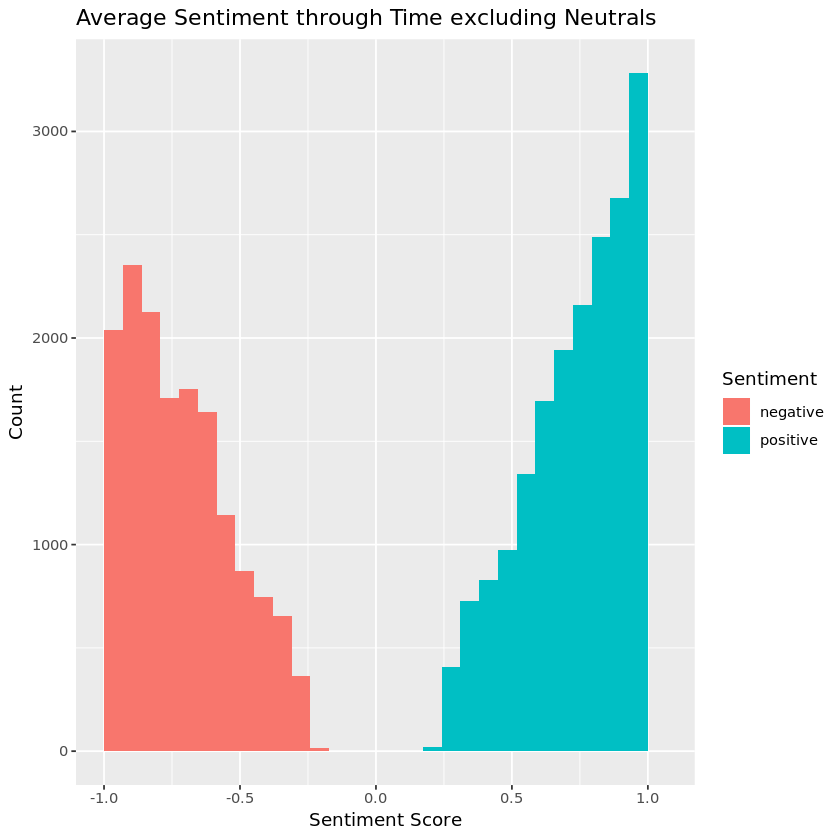

In [0]:
# no neutrals version
df %>% 
    # remove missing NLU sentiments and neutral messages
    filter(!is.na(sentiment_score) & sentiment_label!='neutral') %>%
    # plot
    ggplot(aes(sentiment_score, fill=sentiment_label)) +
    geom_histogram(bins=30) + 
    labs(title='Average Sentiment through Time excluding Neutrals',
        y = 'Count',
        x = 'Sentiment Score',
        fill = 'Sentiment')

### Distribution of emotions

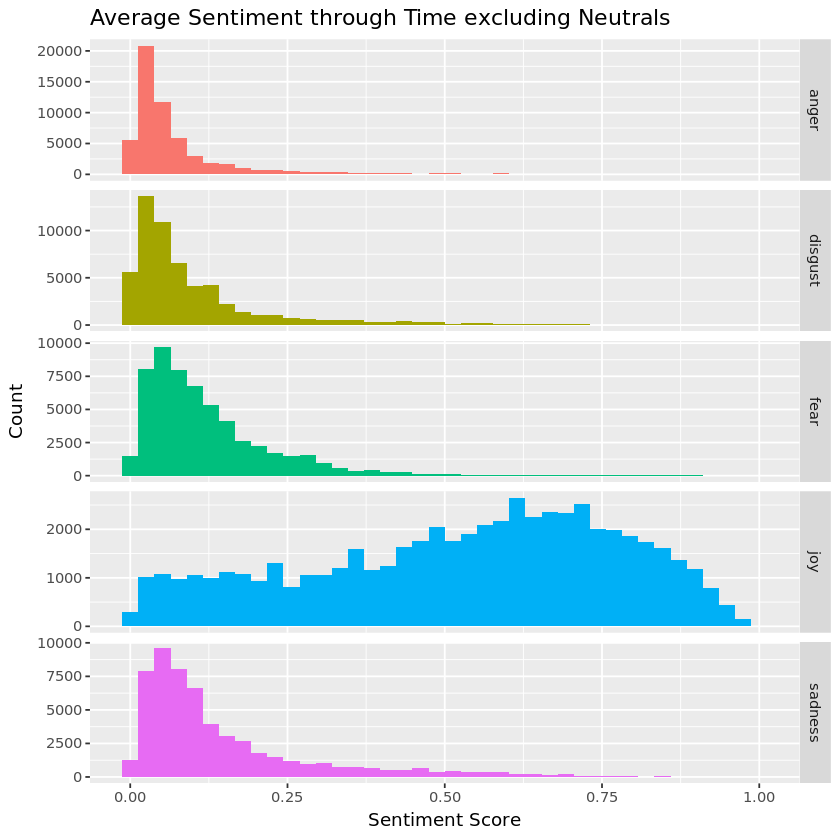

In [0]:
df %>% 
    # "melt" data from "wide" into "long" format for convenient ggplot2 plotting
    reshape2::melt(id.vars = c('timestamp'), 
                   measure.vars = c('emotion_anger', 'emotion_disgust', 'emotion_fear', 'emotion_joy', 'emotion_sadness')) %>%
    # change emotion names for plotting
    mutate(
        variable = factor(variable,
                          c('emotion_anger', 'emotion_disgust', 'emotion_fear', 'emotion_joy', 'emotion_sadness'),
                          c('anger', 'disgust', 'fear', 'joy', 'sadness')
                         )
    ) %>%
    # remove missing NLU emotions
    filter(!is.na(value)) %>%
    # plot
    ggplot(aes(value, fill=variable)) +
    geom_histogram(bins=40) + 
    labs(title='Average Sentiment through Time excluding Neutrals',
        y = 'Count',
        x = 'Sentiment Score',
        fill = 'Sentiment') +
    facet_grid(rows=vars(variable), scales='free_y') +
    theme(legend.position = "None")

### Sentiment through time

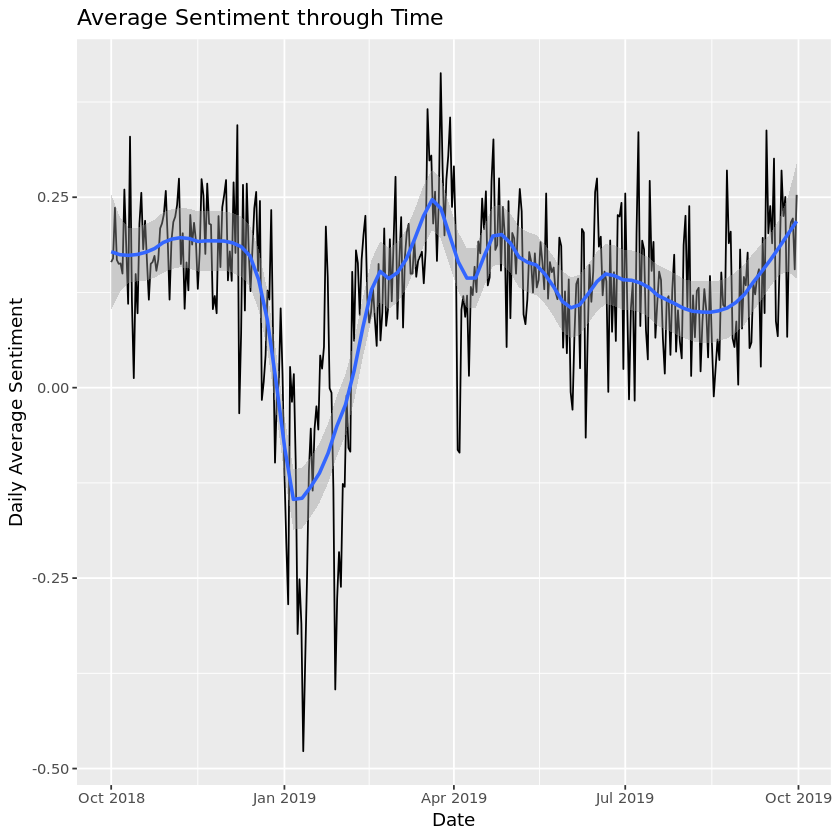

In [0]:
df %>% 
    # remove missing NLU sentiments and neutral messages
    filter(!is.na(sentiment_score)) %>%
    # group data by day and sentiment label
    group_by(date = lubridate::date(timestamp)) %>% 
    # for groupings, calculate average sentiment score
    summarize(avg_sentiment = mean(sentiment_score, na.rm=T)) %>% 
    # plot
    ggplot(aes(date, avg_sentiment)) +
    geom_line() +
    geom_smooth(method='loess', span=0.15) +
    labs(title='Average Sentiment through Time',
        y = 'Daily Average Sentiment',
        x = 'Date')

### Emotions through time

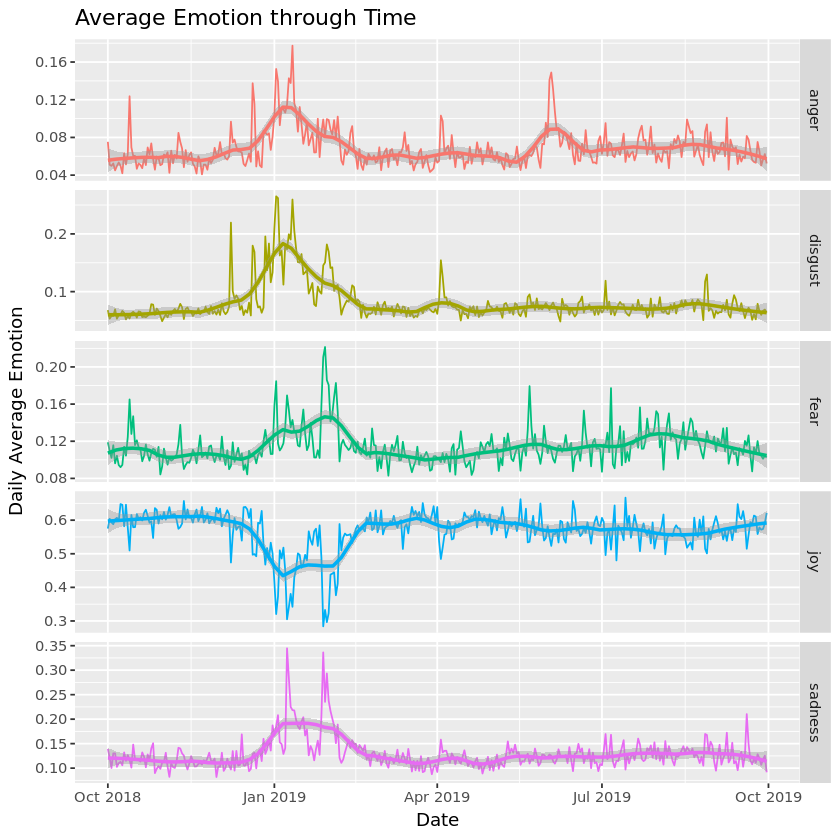

In [0]:
df %>% 
    # "melt" data from "wide" into "long" format for convenient ggplot2 plotting
    reshape2::melt(id.vars = c('timestamp'), 
                   measure.vars = c('emotion_anger', 'emotion_disgust', 'emotion_fear', 'emotion_joy', 'emotion_sadness')) %>%
    # change emotion names for plotting
    mutate(
        variable = factor(variable,
                          c('emotion_anger', 'emotion_disgust', 'emotion_fear', 'emotion_joy', 'emotion_sadness'),
                          c('anger', 'disgust', 'fear', 'joy', 'sadness')
                         )
    ) %>%
    # remove missing NLU emotions
    filter(!is.na(value)) %>%
    # group data by day and sentiment label
    group_by(date = lubridate::date(timestamp), variable) %>% 
    # for groupings, calculate average emotion score
    summarize(emotion = mean(value, na.rm=T)) %>% 
    # plot
    ggplot(aes(date, emotion, color=variable)) +
    geom_line() +
    geom_smooth(method='loess', span=0.15) +
    labs(title='Average Emotion through Time',
        y = 'Daily Average Emotion',
        x = 'Date') +
    facet_grid(rows=vars(variable), scales='free_y') +
    theme(legend.position = "None")